# Data Visualisation 1

Key goals:

* Learn to play with basic Matplotlib settings
* Get used to using pandas
* Learn some more advanced plotting techniques
    - Using subplots
    - Irregularly sized subplots
    - Using seaborn
    - KDEs
    
It would be nice to play with the data and replicate existing interesting "features":
* hot Neptune desert
* Evaporation valley
* 20-20 Mass-Period gap
* Hot Jupiter inflation

See slides: https://docs.google.com/presentation/d/1CxGbpuZuiOQ_VuN8tpA2N9XrJyA_y0PGHWp5ghTmMtI/edit?usp=sharing

### Getting the data

We'll use the NASA Exoplanet Archive - it is the best repository for the data on confirmed exoplanets.

While Pandas is usually OK at opening CSVs, astronomers love to include detailed headers which messes up `pd.read_csv`, so we'll use astropy's `ascii.read`. This natively produces an astropy Tables object, but here we can convert it to a pandas `DataFrame` which is slightly more intuitive.

In [1]:
from IPython.display import Image

import numpy as np
from astropy.io import ascii
import pandas as pd

from io import BytesIO

import urllib.request as urlrq
import certifi
link="https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps+where+default_flag=1&format=csv"
dat=urlrq.urlopen(link).read()
all_planets = pd.read_csv(BytesIO(dat))

/var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/ipykernel_43382/1461581057.py:13: DtypeWarning: Columns (183,187,206,211) have mixed types. Specify dtype option on import or set low_memory=False.
  all_planets = pd.read_csv(BytesIO(dat))


_(If this doesnt work, a CSV can be downloaded from https://exoplanetarchive.ipac.caltech.edu)_

### What is all this data?

5000+ planets all with key information.

Here:
- "st\_" refers to parameters of the star
- "pl\_" refers to planetary parameters
- "sy\_" refers to the various magnitudes of the star
- "err1" suffix refers to positive errors
- "err2" suffix refers to negative errors

In [2]:
all_planets.describe() #This function shows the relative stats for each column/row:

,default_flag,disc_year,ra,dec,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,...,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2
count,5060.0,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,4.886000e+03,4.399000e+03,...,4907.000000,4903.000000,4889.000000,4889.000000,4917.000000,4896.000000,4896.000000,4912.000000,4880.000000,4880.000000
mean,1.0,2015.475296,240.569158,21.638603,128.166173,6.968954,251.101215,32.946543,8.610598e+04,1.080478e+05,...,-0.106574,11.159920,0.036723,-0.035983,10.790148,0.039218,-0.039161,10.686177,0.044361,-0.044330
std,0.0,4.217264,88.373069,34.152672,92.073155,27.882270,92.823085,42.211829,5.753179e+06,7.086532e+06,...,0.214921,2.948895,0.160060,0.139479,2.997796,0.130466,0.137399,3.008777,0.276541,0.282716
min,1.0,1989.000000,0.185606,-88.121111,0.039250,-88.324780,0.444070,-87.163720,9.070629e-02,0.000000e+00,...,-11.920000,-2.095000,0.017000,-8.888000,-2.775000,0.014000,-8.100000,-3.044000,0.011000,-9.995000
25%,1.0,2014.000000,190.933204,-2.203829,73.938852,3.498080,199.813335,-2.634990,4.458856e+00,1.600000e-05,...,-0.126000,9.612001,0.022000,-0.027000,9.250000,0.022000,-0.033000,9.151750,0.020000,-0.032000
50%,1.0,2016.000000,286.947538,40.520897,79.076830,12.098760,300.475140,60.295560,1.153857e+01,1.000000e-04,...,-0.080000,12.142000,0.024000,-0.024000,11.753000,0.026000,-0.026000,11.655500,0.023000,-0.023000
75%,1.0,2018.000000,293.796351,45.609910,190.314940,17.291745,311.602860,65.675443,3.945501e+01,1.449000e-03,...,-0.030000,13.435500,0.027000,-0.022000,13.014000,0.033000,-0.022000,12.924000,0.032000,-0.020000
max,1.0,2022.000000,359.974984,85.736533,359.996270,86.470460,359.901170,87.182910,4.020000e+08,4.700000e+08,...,-0.001000,25.340000,8.888000,-0.017000,32.340000,6.790000,-0.014000,33.110000,9.995000,-0.011000


In [3]:
all_planets['st_rad'] #Stellar radius

0        1.17
1         NaN
2         NaN
3       20.90
4         NaN
        ...  
5055     1.02
5056     0.88
5057      NaN
5058      NaN
5059      NaN
Name: st_rad, Length: 5060, dtype: float64

If we want an array (rather than a Pandas Series), we can use `.values`

In [4]:
all_planets['pl_rade'].values #Planetary radius in earth radii. This is now a numpy array

array([14.011,    nan, 13.   , ...,    nan,    nan,    nan])

#### Indexing pandas DataFrames

We can use `.loc` with a condition to index a DataFrame. For example, let's say we want to see all of the planetary radii and errorsaround small stars (M-dwarfs):

In [5]:
all_planets.loc[all_planets['st_rad']<0.5,['hostname','pl_name','st_rad','pl_rade','pl_radeerr1','pl_radeerr2']]

,hostname,pl_name,st_rad,pl_rade,pl_radeerr1,pl_radeerr2
22,Kepler-327,Kepler-327 d,0.49,1.730,0.100,-0.100
63,DH Tau,DH Tau b,0.27,NaN,NaN,NaN
84,GJ 9066,GJ 9066 c,0.16,NaN,NaN,NaN
99,GJ 876,GJ 876 b,0.30,NaN,NaN,NaN
100,GJ 876,GJ 876 c,0.30,NaN,NaN,NaN
...,...,...,...,...,...,...
4876,TOI-270,TOI-270 b,0.38,1.206,0.039,-0.039
4877,TOI-270,TOI-270 c,0.38,2.355,0.064,-0.064
4888,L 98-59,L 98-59 d,0.30,1.521,0.119,-0.098
4906,K2-332,K2-332 b,0.28,2.200,0.190,-0.150


### Initialising matplotlib

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline # <- this is the backend which means we don't need to run "plt.show()" to display an image.
#%matplotlib # <- this would display an image in a seperate window
#Any of these back-ends should provide interactive plots in the notebook (if you want them!):
# ['GTK3Agg', 'nbAgg', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WebAgg', 'WX', 'WXAgg', 'agg']

Matplotlib created a temporary config/cache directory at /var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/matplotlib-7eo2nebj because the default path (/Users/hosborn/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
UsageError: unrecognized arguments: # <- this is the backend which means we don't need to run "plt.show()" to display an image.


### Simple plotting with matplotlib

Text(0, 0.5, 'Mass [Earth masses]')

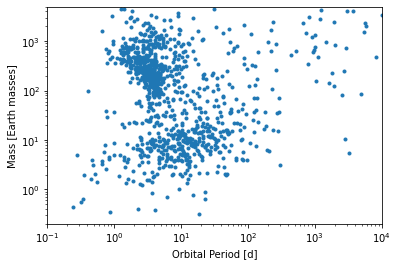

In [7]:
plt.plot(all_planets['pl_orbper'],all_planets['pl_masse'],'.') #We need '.' to tell it to draw points.

#Making the axes logged
plt.xscale('log') 
plt.yscale('log') 

#Setting axes scales:
plt.ylim(0.2,5000)
plt.xlim(0.1,10000)

#Adding axes labels:
plt.xlabel("Orbital Period [d]")
plt.ylabel("Mass [Earth masses]")

#### Excercise
Try to plot some other data parameters yourself. Here are the potential planetary parameters:

In [8]:
print([col for col in all_planets if 'err' not in col and col[:3]=='pl_'])

['pl_name', 'pl_letter', 'pl_refname', 'pl_orbper', 'pl_orbperlim', 'pl_orbperstr', 'pl_orblper', 'pl_orblperlim', 'pl_orblperstr', 'pl_orbsmax', 'pl_orbsmaxlim', 'pl_orbsmaxstr', 'pl_orbincl', 'pl_orbincllim', 'pl_orbinclstr', 'pl_orbtper', 'pl_orbtperlim', 'pl_orbtperstr', 'pl_orbeccen', 'pl_orbeccenlim', 'pl_orbeccenstr', 'pl_eqt', 'pl_eqtlim', 'pl_eqtstr', 'pl_occdep', 'pl_occdeplim', 'pl_occdepstr', 'pl_insol', 'pl_insollim', 'pl_insolstr', 'pl_dens', 'pl_denslim', 'pl_densstr', 'pl_trandep', 'pl_trandeplim', 'pl_trandepstr', 'pl_tranmid', 'pl_tranmidlim', 'pl_tranmidstr', 'pl_trandur', 'pl_trandurlim', 'pl_trandurstr', 'pl_controv_flag', 'pl_tsystemref', 'pl_projobliq', 'pl_projobliqlim', 'pl_projobliqstr', 'pl_rvamp', 'pl_rvamplim', 'pl_rvampstr', 'pl_radj', 'pl_radjlim', 'pl_radjstr', 'pl_rade', 'pl_radelim', 'pl_radestr', 'pl_ratror', 'pl_ratrorlim', 'pl_ratrorstr', 'pl_ratdor', 'pl_trueobliq', 'pl_trueobliqlim', 'pl_trueobliqstr', 'pl_pubdate', 'pl_ratdorlim', 'pl_ratdorstr',

### Using `plt.scatter`

Using a scatter plot, we can add extra dimensions - i.e. colour, markersize, etc:

/Users/hosborn/miniconda3/envs/freshwake/lib/python3.10/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


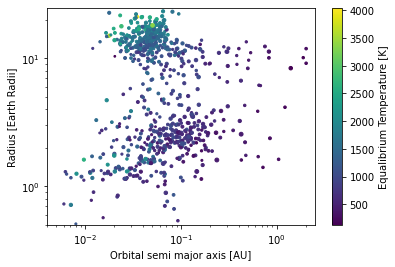

In [9]:
plt.scatter(all_planets['pl_orbsmax'],all_planets['pl_rade'],
            c=all_planets['pl_eqt'], #Colour, here a function of surface temperature
            s=20-all_planets['sy_gaiamag']) #Point size, here a function of gaia magnitude (but subtracted from 20 for clarity)

#If we want to see what the colour refers to, we need a color scale:
plt.colorbar(label="Equalibrium Temperature [K]")

#Making the axes logged
plt.xscale('log') 
plt.yscale('log') 

#Setting axes scales:
plt.ylim(0.5,25)
plt.xlim(0.004,2.5)

#Adding axes labels:
plt.xlabel("Orbital semi major axis [AU]")
plt.ylabel("Radius [Earth Radii]")

#Saving a plot:
plt.savefig("Initial_orbit_plot.png")

#### Even more complex - using markers as a fifth dimension

Let's try again but loop over discovery method.

Text(0, 0.5, 'Mass [Earth Mass]')

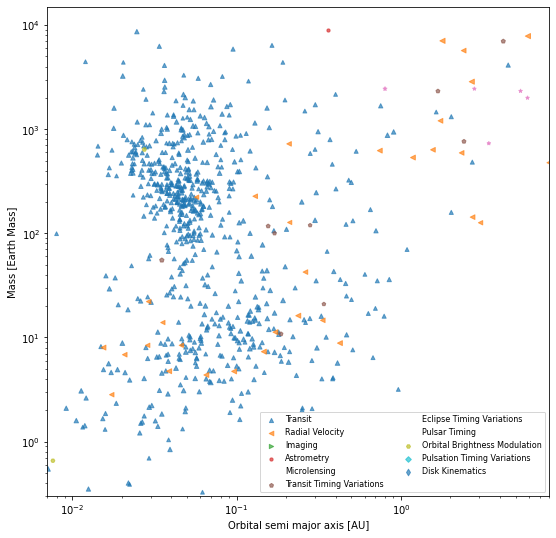

In [10]:
from matplotlib.markers import MarkerStyle #Getting a list of markers

plt.figure(figsize=(9,9)) #Let's make this a bigger plot, as it will have more info...

#Looping over different discovery methods:
for i, discmeth in enumerate(pd.unique(all_planets['discoverymethod'])):
    disc_index = all_planets['discoverymethod'].values == discmeth
    plt.scatter(all_planets.loc[disc_index,'pl_orbsmax'],all_planets.loc[disc_index,'pl_masse'],
                s=30-all_planets.loc[disc_index,'sy_gaiamag'], #Point size, here a function of gaia magnitude (but subtracted from 30 for clarity)
                marker=MarkerStyle.filled_markers[2+i],
                alpha=0.66, #Transparency - helps where points are stacked together
                label=discmeth)

#Adding a legend for each markerstlye:
plt.legend(loc=4,fontsize=8,ncol=2) # here we specify the location, fontsize and the number of columns in the legend

#Making the axes logged
plt.xscale('log') 
plt.yscale('log') 

#Setting axes scales:
plt.ylim(0.3,15000)
plt.xlim(0.007,8)

#Adding axes labels:
plt.xlabel("Orbital semi major axis [AU]")
plt.ylabel("Mass [Earth Mass]")


### Recreating the Neptune Desert

In the previous plots, we have basically just done that!

In [11]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/40/Neptunian_Desert_Visualization.png", width=400, height=400)

You should be able to see the dearth of planets below the "hot Jupiters". 


### Exercise 
Try to write an index (or function) which seperates those planets in the desert from the rest of the planets

In [ ]:
#This is a very rough guess - try to improve this!
in_desert = (all_planets['pl_orbper']<5)&(all_planets['pl_rade']>1.5)&(all_planets['pl_rade']<0.8)

plt.scatter(all_planets.loc[in_desert,'pl_orbper'],all_planets.loc[in_desert,'pl_orbper'],
            c='r')
plt.scatter(all_planets.loc[~in_desert,'pl_orbper'],all_planets.loc[~in_desert,'pl_orbper'],
            c='b')

#Try to:
#  - modify the index function to better represent the "desert" region
#  - add axes labels
#  - add marker labels
#  - change the colours
#  - modify the x & y limits
#  - Add variable colours with another parameter
#  - save the plot

## Using `plt.errorbar` with a Mass-Radius plot

We also often want to include errorbars in our plots. We can do this with `plt.errorbar`.

Text(0, 0.5, 'Radius [Earth radii]')

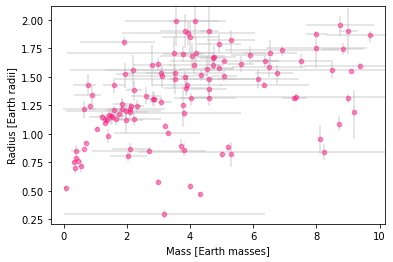

In [28]:
terrestrial_planets = (all_planets['pl_rade']<2)&(all_planets['pl_masse']<10)

plt.errorbar(all_planets.loc[terrestrial_planets,'pl_masse'],
             all_planets.loc[terrestrial_planets,'pl_rade'],
             xerr=[all_planets.loc[terrestrial_planets,'pl_masseerr1'],abs(all_planets.loc[terrestrial_planets,'pl_masseerr2'])],
             yerr=[all_planets.loc[terrestrial_planets,'pl_radeerr1'],abs(all_planets.loc[terrestrial_planets,'pl_radeerr2'])],
             fmt='.',#<- important so that it's not a line plot
             markersize=9,alpha=0.5,
             ecolor='#bbbbbb',
             color='#ff1983')
plt.xlabel("Mass [Earth masses]")
plt.ylabel("Radius [Earth radii]")


What does this mean for exoplanet densities? We can load some internal structure models from L. Zeng

/var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/ipykernel_43382/2651249293.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,12)
/var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/ipykernel_43382/2651249293.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,2.5)


Text(0, 0.5, 'Radius [Earth radii]')

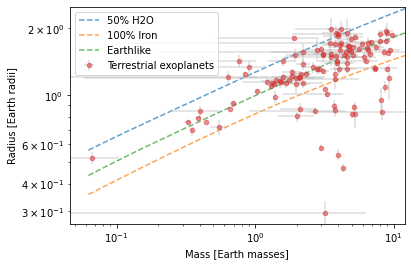

In [51]:
models=pd.read_csv("https://lweb.cfa.harvard.edu/~lzeng/tables/mrtable3.txt",delim_whitespace=True,index_col=None).iloc[1:]

plt.plot(models['50%fe'].index.astype(float), models['50%h2o'].values.astype(float),
         '--',alpha=0.7,label='50% H2O')
plt.plot(models['100%fe'].index.astype(float), models['100%fe'].values.astype(float),
         '--',alpha=0.7,label='100% Iron')
plt.plot(models['35%fe'].index.astype(float), models['35%fe'].values.astype(float),
         '--',alpha=0.7,label='Earthlike')
#plt.plot(models['cold_h2/he'].index.astype(float), models['cold_h2/he'].values.astype(float),'--',alpha=0.7)

plt.errorbar(all_planets.loc[terrestrial_planets,'pl_masse'],
             all_planets.loc[terrestrial_planets,'pl_rade'],
             xerr=[all_planets.loc[terrestrial_planets,'pl_masseerr1'],abs(all_planets.loc[terrestrial_planets,'pl_masseerr2'])],
             yerr=[all_planets.loc[terrestrial_planets,'pl_radeerr1'],abs(all_planets.loc[terrestrial_planets,'pl_radeerr2'])],
             fmt='.',#<- important so that it's not a line plot
             markersize=9,alpha=0.5,
             ecolor='#bbbbbb',label='Terrestrial exoplanets')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlim(0,12)
plt.ylim(0,2.5)
plt.xlabel("Mass [Earth masses]")
plt.ylabel("Radius [Earth radii]")

#### Excercise:
This mass-radius diagram is populated with exoplanets with extremely poorly-determined masses (i.e. very high mass errors)... 
* Try to remove these highly uncertain using an additional index to the all_planets dataframe
* Try to combine with a scatter plot and include a third parameter (i.e. equilibrium temperature)
* Add the computed exoplanet as a parameter to the all_planets table, and plot this instead of e.g. Mass or Radius

# Plotting eccentricities with `plt.hist`

Another useful plot is the histogram. Let's see how to do this using exoplanet eccentricities.

Let's split this up between single- and multi-planets systems

Text(0, 0.5, 'Density')

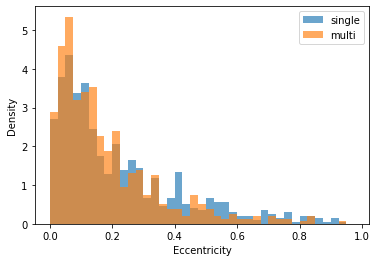

In [61]:
#We also need to mask those systems where eccentricity was set to be exactly 0.00
single_planets=(all_planets['sy_pnum']==1)&(all_planets['pl_orbeccen']>0.0)
multi_planets=(all_planets['sy_pnum']>1)&(all_planets['pl_orbeccen']>0.0)
_=plt.hist(all_planets.loc[single_planets,'pl_orbeccen'],density=True,
           bins=np.arange(0,1,0.025),alpha=0.66,label="single")
_=plt.hist(all_planets.loc[multi_planets,'pl_orbeccen'],density=True,
           bins=np.arange(0,1,0.025),alpha=0.66,label="multi")
plt.legend()
plt.xlabel("Eccentricity")
plt.ylabel("Density")

What does this tell us about planetary systems?

#### Excercise:
* Try the same excercise, but splitting the data by orbital period - how do eccentricities vary as a function of P?

## Recreating the Radius Valley

The radius valley is a region of parameter space seen in transiting planets from Kepler where there are fewer planets due to... some process (either evaporation, formation, or core-driven mass loss - we still don't know).
Below are the "classic" valley plots. Let's try to recreate them.

In [13]:
Image(url="https://static.wixstatic.com/media/b5d8a1_52d10a4753d441389bc01849dd3abe63~mv2.png/v1/fill/w_1000,h_368,al_c,usm_0.66_1.00_0.01/b5d8a1_52d10a4753d441389bc01849dd3abe63~mv2.png", width=900, height=400)

Incoming flux

In [14]:
#You can ignore this - here I am simply fixing some missing properties like stellar luminosity or orbsmax

#Fixing mass
nomass=pd.isnull(all_planets['st_mass'])&~pd.isnull(all_planets['st_rad'])
all_planets.loc[nomass,'st_mass']=all_planets.loc[nomass,'st_rad']**(1/0.85) #Main-sequence relation
all_planets.loc[nomass,'st_masserr1']=0.25*all_planets.loc[nomass,'st_mass']
all_planets.loc[nomass,'st_masserr2']=0.25*all_planets.loc[nomass,'st_mass']
#Fixing radius
norad=pd.isnull(all_planets['st_rad'])&~pd.isnull(all_planets['st_mass'])
all_planets.loc[norad,'st_rad']=0.4381*all_planets.loc[norad,'st_mass']**2 + 0.4792*all_planets.loc[norad,'st_mass'] + 0.0755 #Main-sequence relation
all_planets.loc[norad,'st_raderr1']=all_planets.loc[norad,'st_rad']*np.hypot(0.1,all_planets.loc[norad,'st_masserr1']/all_planets.loc[norad,'st_mass'])
all_planets.loc[norad,'st_raderr2']=all_planets.loc[norad,'st_rad']*np.hypot(0.1,all_planets.loc[norad,'st_masserr2']/all_planets.loc[norad,'st_mass'])
#Fixing luminosity
def lum_est(Ms):
    #Main sequence luminosity relation from mass to lum
    Ms=np.array(Ms) if type(Ms) in [float,np.float32,np.float64] else Ms
    logM=np.log10(Ms)
    loglum=np.zeros_like(logM)
    loglum[Ms<=0.45]=2.028*logM[Ms<=0.45]-0.976
    loglum[(Ms>0.45)&(Ms<=0.72)]=4.572*logM[(Ms>0.45)&(Ms<=0.72)]-0.102
    loglum[(Ms<=1.05)&(Ms>0.72)]=5.743*logM[(Ms<=1.05)&(Ms>0.72)]-0.007
    loglum[(Ms>1.05)&(Ms<=2.4)]=4.329*logM[(Ms>1.05)&(Ms<=2.4)]+0.01
    loglum[(Ms<=7)&(Ms>2.4)]=3.967*logM[(Ms<=7)&(Ms>2.4)]+0.093
    loglum[(Ms>7)]=2.865*logM[(Ms>7)]+1.105
    return loglum
nolum=pd.isnull(all_planets['st_lum'])&~pd.isnull(all_planets['st_mass'])
all_planets.loc[nolum,'st_lum'] = lum_est(all_planets.loc[nolum,'st_mass'])
all_planets.loc[nolum,'st_lumerr1'] = 0.1
all_planets.loc[nolum,'st_lumerr2'] = 0.1
#Fixing temp
noteff=pd.isnull(all_planets['st_teff'])&~pd.isnull(all_planets['st_mass'])&~pd.isnull(all_planets['st_lum'])
all_planets.loc[noteff,'st_teff']=(all_planets.loc[noteff,'st_rad']**2/np.power(10,all_planets.loc[noteff,'st_lum']))**(1/4)*5778
all_planets.loc[noteff,'st_tefferr1']=all_planets.loc[noteff,'st_teff']*0.25*np.sqrt(2*(all_planets.loc[noteff,'st_raderr2']/all_planets.loc[noteff,'st_rad'])**2+all_planets.loc[nolum,'st_lumerr1'])
all_planets.loc[noteff,'st_tefferr2']=all_planets.loc[noteff,'st_teff']*0.25*np.sqrt(2*(all_planets.loc[noteff,'st_raderr1']/all_planets.loc[noteff,'st_rad'])**2+all_planets.loc[nolum,'st_lumerr2'])
#Fixing planet SMA
nosma=pd.isnull(all_planets['pl_orbsmax'])&~pd.isnull(all_planets['pl_orbper'])
all_planets.loc[nosma,'pl_orbsmax'] = ((6.67e-11*all_planets.loc[nosma,'st_mass']*1.96e30*(86400*all_planets.loc[nosma,'pl_orbper'])**2)/(4*np.pi**2))**(1/3)/1.49e11
all_planets.loc[nosma,'pl_orbsmaxerr'] = all_planets.loc[nosma,'pl_orbsmax']*0.33*np.sqrt((all_planets.loc[nosma,'st_masserr1']/all_planets.loc[nosma,'st_mass'])**2+2*(all_planets.loc[nosma,'pl_orbpererr1']/all_planets.loc[nosma,'pl_orbper'])**2)
all_planets.loc[~nosma,'pl_orbsmaxerr'] = 0.5*(abs(all_planets.loc[nosma,'pl_orbsmaxerr1'])+abs(all_planets.loc[nosma,'pl_orbsmaxerr2']))

We want the insolation. This isn't in the all_planets table... So we need to derive it ourselves, but this is simply the flux from the solar luminosity at the distance of the planet.

$ S_{\rm in} = L_{st}/(4.\pi.a_{pl}^2) $

We want this relative to Earth, which is $1361W.m^{-2}$

In [19]:
noinsol=pd.isnull(all_planets['pl_insol'])&~pd.isnull(all_planets['pl_orbsmax'])&~pd.isnull(all_planets['st_lum'])

all_planets.loc[noinsol,'pl_insol']=(np.power(10,all_planets.loc[noinsol,'st_lum'])*3.828e26/(4*np.pi**2*(all_planets.loc[noinsol,'pl_orbsmax']*1.49e11)**2))/1361
all_planets.loc[noinsol,'pl_insol_err']=all_planets.loc[noinsol,'pl_insol']*np.sqrt(all_planets.loc[noinsol,'st_lumerr1']+2*(all_planets.loc[noinsol,'pl_orbsmaxerr']/all_planets.loc[noinsol,'pl_orbsmax'])**2)


## Subplots

We can put two linked plots together using matplotlib "subplots".

There are two ways to do this:

1) using `plt.add_subplot(nrow,ncol,nplot)` where you can then use `plt.plot...`, etc as usual

2) using `ax = fig.subplots(nrow,ncol)` where each axis object is manipulated 

(0.1, 22.0)

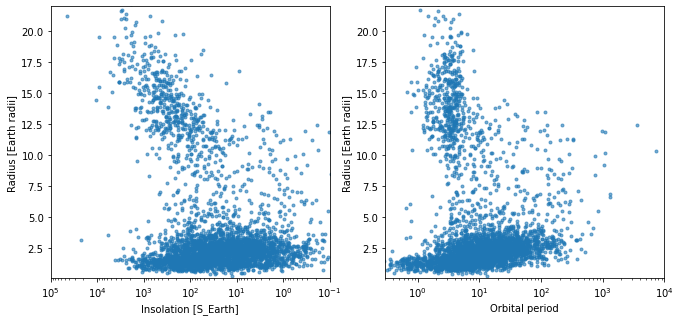

In [16]:
# Initialising the subplots
fig=plt.figure(figsize=(11, 5))
ax = fig.subplots(nrows=1, ncols=2) 

ax[0].plot(all_planets['pl_insol'],all_planets['pl_rade'],'.',alpha=0.6)
ax[0].set_xlabel("Insolation [S_Earth]")
ax[0].set_ylabel("Radius [Earth radii]")
ax[0].set_xscale('log')
ax[0].set_xlim(1e5,0.1) #<- swapping the highest and lowest numbers reverses the x axis
ax[0].set_ylim(0.1,22)

ax[1].plot(all_planets['pl_orbper'],all_planets['pl_rade'],'.',alpha=0.6)
ax[1].set_xlabel("Orbital period")
ax[1].set_ylabel("Radius [Earth radii]")
ax[1].set_xscale('log')
ax[1].set_xlim(0.3,1e4)
ax[1].set_ylim(0.1,22)

Here there are a LOT of planets in a very small area. These are difficult to see! 

So how can we see the true density of planets here? One way is to use a KDE:

/Users/hosborn/miniconda3/envs/newxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hosborn/miniconda3/envs/newxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


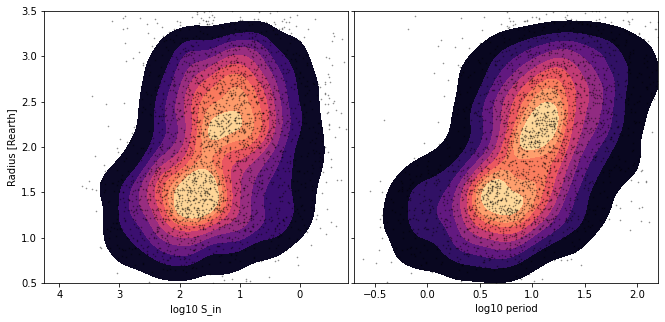

In [168]:
fig=plt.figure(figsize=(11, 5))
ax = fig.subplots(nrows=1, ncols=2, sharey=True) 

#Let's cut this to short-period small planets
short_per=(all_planets['pl_insol']>0.4)&(all_planets['pl_rade']<3.25)

#Performing the KDE with seaborn
import seaborn as sns
sns.kdeplot(np.log10(all_planets.loc[short_per,'pl_insol'].values),
            all_planets.loc[short_per,'pl_rade'].values,ax=ax[0],
            shade=True,cmap='magma')

#Also plotting the positions of planets as small faint dots:
ax[0].plot(np.log10(all_planets['pl_insol']), all_planets['pl_rade'], '.k', alpha=0.4, markersize=1.2)
ax[0].set_xlim(4.25,-0.8)
ax[0].set_ylim(0.5,3.5)
ax[0].set_xlabel("log10 S_in")
ax[0].set_ylabel("Radius [Rearth]")


#Doing the same for orbital period too:
sns.kdeplot(np.log10(all_planets.loc[short_per,'pl_orbper'].values),
            all_planets.loc[short_per,'pl_rade'].values,ax=ax[1],
            shade=True,cmap='magma')
ax[1].plot(np.log10(all_planets['pl_orbper']), all_planets['pl_rade'], '.k', alpha=0.4, markersize=1.2)
ax[1].set_xlim(-0.7,2.2)
ax[1].set_ylim(0.5,3.5)
ax[1].set_xlabel("log10 period")

plt.subplots_adjust(wspace=0.02)
#ax[1].set_ylabel("Radius [Rearth]")

### Now:

* Try to vary the parameters for the kde (`bw`, `levels`, `thresh`, `cmap`, etc) and see what other features are evident
* Try to include the best-fit radius valleys from
    - Martinez - https://arxiv.org/abs/1903.00174
    - VanEylen - https://arxiv.org/abs/1710.05398
    - Cloutier - https://arxiv.org/abs/1912.02170

Which matches the data best?

* Try to plot kdes for other combinations of parameters.

# Final activities

### Recreating the 20-20 Mass gap

In [17]:
Image(url="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41550-019-0873-1/MediaObjects/41550_2019_873_Figa_HTML.png",width=400,height=400)

### Recreating the Radius Inflation limit

(Incident flux here is the same thing we defined above - insolation)

In [18]:
Image(url="https://agupubs.onlinelibrary.wiley.com/cms/asset/0d4086b4-62df-4735-8d72-2b79c4fb774b/jgre21596-fig-0002-m.jpg",width=400,height=400)

### What other features can you find?